# Hybrid Control Car


# 1 Setup

In [1]:
import hybrid_control_car as hcc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

hz = 100 # Simulation steps per second
dt = 0.01 # Seconds per simulation timestep
units_per_meter = 100 # 1 unit = 1 cm
nstates = 6 # Number of states in the system

params = {
    'm': 0.5, # kg
    'hw': 0.3*units_per_meter, # m
    'hh': 0.15*units_per_meter # m
}

In [6]:
def plot_response(t, states, inputs):
    x = states[:, 0]/units_per_meter
    z = states[:, 1]/units_per_meter
    nx = states[:, 2]
    nz = states[:, 3]
    v = states[:, 4]
    w = states[:, 5]*hz

    Fe = inputs[:, 0]/1000.0
    theta = inputs[:, 1]

    fig, axs = plt.subplots(3, 2, sharex=True, figsize = (12, 12))
    axs = axs.flatten()

    axs[0].plot(t, x, label='$x$')
    axs[0].plot(t, z, label='$z$')
    axs[0].set_title("Position Response")
    axs[0].set_ylabel("position (m)")
    axs[0].legend()

    axs[1].plot(t, v)
    axs[1].set_title("Forwards Speed Response")
    axs[1].set_ylabel("speed (m/s)")

    axs[2].plot(t, nx, label='$n_x$')
    axs[2].plot(t, nz, label='$n_z$')
    axs[2].set_title("Forwards Vector vs. Time")
    axs[2].set_ylabel("size")
    axs[2].legend()

    axs[3].plot(t, w)
    axs[3].set_title("Angular Velocity Response")
    axs[3].set_ylabel("angular velocity (rad/s)")

    axs[4].plot(t, theta, label=r"$\theta$")
    axs[4].set_title("Steering Angle Input")
    axs[4].set_xlabel("time (s)")
    axs[4].set_ylabel("angle (rad)")
    axs[4].legend()

    axs[5].plot(t, Fe)
    axs[5].set_title("Engine Force Input")
    axs[5].set_xlabel("time (s)")
    axs[5].set_ylabel("force (kN)")

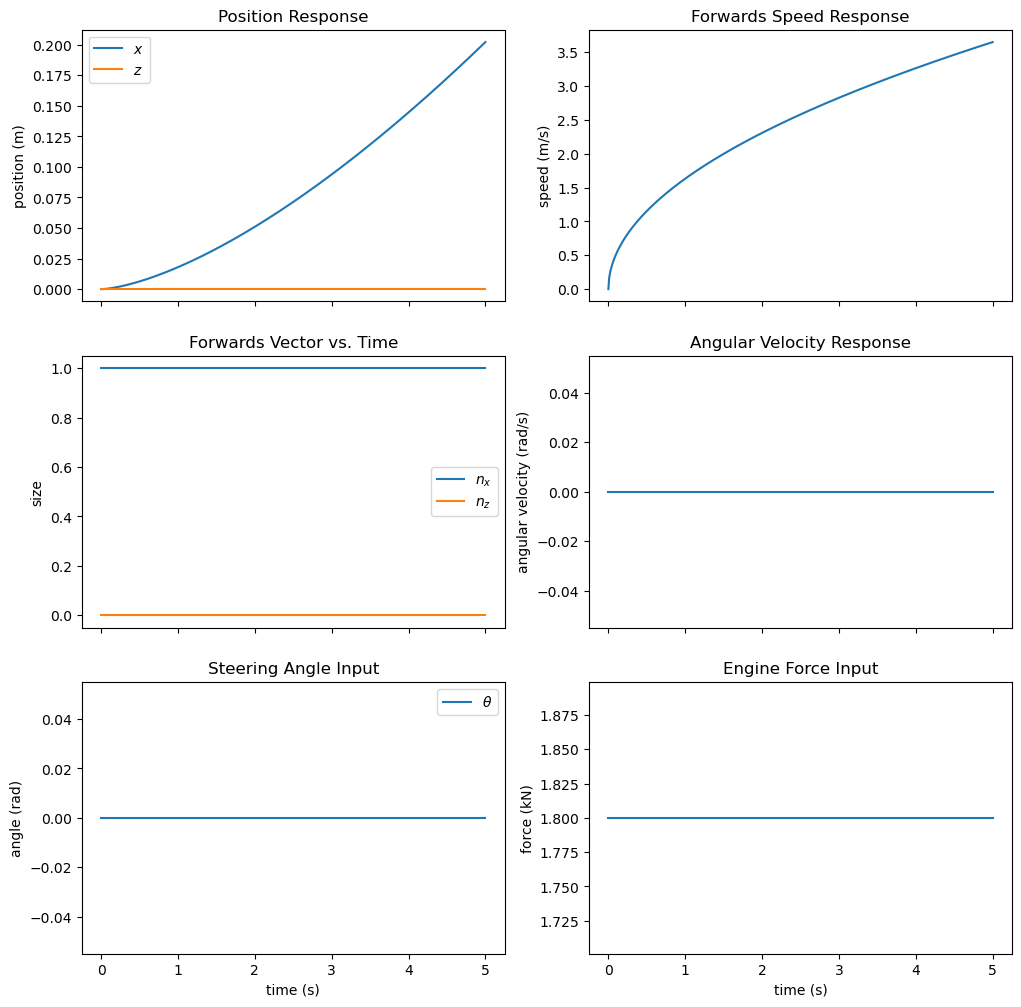

In [8]:
nsteps_test = 5*hz

test_inputs = np.vstack((
    1.8*np.ones(nsteps_test),
    0.0*np.ones(nsteps_test)
)).T
test_states = np.zeros((nsteps_test, nstates))
phi0 = 0
x0 = np.array([0.0, 0.0, np.cos(phi0), np.sin(phi0), 0.0, 0.0])

for t in range(nsteps_test):
    u = test_inputs[t, :]
    u[0] = u[0]*1000
    x = hcc.simulate(x0, u, params)
    test_states[t, :] = x0
    x0 = x

plot_response(np.linspace(0, 5, nsteps_test), test_states, test_inputs)


In [11]:
x_true = np.zeros(nsteps_test)
xi = 0.0

for t in range(nsteps_test):
    x_true[t] = xi
    xi += test_states[t, 4]*dt

print(x_true[-1])

12.131430640899907
